#Mega Case Study - Making a hybrid Deep Learning Model

#Part 1 - SOM

##Install MiniSom Package

In [1]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.5-cp36-none-any.whl size=8474 sha256=a8df7050fdb3c71c7b36d079a0237ce5dc8b89623d8159b57ae016f1e5f81102
  Stored in directory: /root/.cache/pip/wheels/39/5b/16/cc9402ffc58cafb1da6997e5c94b1bde65e8cb214907879fd4
Successfully built MiniSom


## Importing the libraries


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [0]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Feature Scaling


In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

##Training the SOM


In [0]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(X, num_iteration=100)

##Visualizing the results


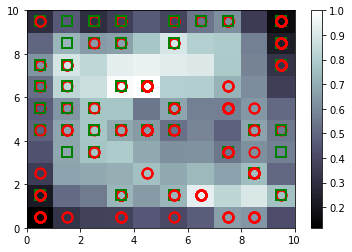

In [6]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0]+0.5,
       w[1]+0.5,
       markers[y[i]],
       markeredgecolor=colors[y[i]],
       markerfacecolor='None',
       markersize=10,
       markeredgewidth=2)

## Finding the frauds


In [0]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(4,6)], mappings[(3,6)]), axis=0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [0]:
print(frauds)

#Part 2 - Going from Unsupervised to Supervised Deep Learning

##Create Matrix of Features

In [10]:
customers = dataset.iloc[:, 1:].values
print(customers)

[[1.000e+00 2.208e+01 1.146e+01 ... 1.000e+02 1.213e+03 0.000e+00]
 [0.000e+00 2.267e+01 7.000e+00 ... 1.600e+02 1.000e+00 0.000e+00]
 [0.000e+00 2.958e+01 1.750e+00 ... 2.800e+02 1.000e+00 0.000e+00]
 ...
 [0.000e+00 1.883e+01 9.540e+00 ... 1.000e+02 1.000e+00 1.000e+00]
 [0.000e+00 2.742e+01 1.450e+01 ... 1.200e+02 1.200e+01 1.000e+00]
 [1.000e+00 4.100e+01 4.000e-02 ... 5.600e+02 1.000e+00 1.000e+00]]


## Create Dependent Variable

In [0]:
is_fraud = np.zeros((len(dataset)))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1
print(is_fraud)

#Part 3 - ANN

### Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

##Import Tensorflow

In [0]:
import tensorflow as tf

## Initializing the ANN

In [0]:
ann = tf.keras.models.Sequential()

##Adding the input layer and the first hidden layer

In [0]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu', input_dim=15))

## Adding the output layer

In [0]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

## Compiling the ANN

In [0]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training set

In [22]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 5)

Epoch 1/5
690/690 [==============================] - 1s 1ms/step - loss: 0.2418 - accuracy: 0.9348
Epoch 2/5
690/690 [==============================] - 1s 988us/step - loss: 0.1885 - accuracy: 0.9348
Epoch 3/5
690/690 [==============================] - 1s 971us/step - loss: 0.1613 - accuracy: 0.9348
Epoch 4/5
690/690 [==============================] - 1s 1ms/step - loss: 0.1454 - accuracy: 0.9348
Epoch 5/5
690/690 [==============================] - 1s 1ms/step - loss: 0.1329 - accuracy: 0.9348


## Predicting test set results

In [25]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis=1)
print(y_pred)

[[1.57761560e+07 3.68273258e-02]
 [1.57395480e+07 8.25629234e-02]
 [1.56628540e+07 2.64747322e-01]
 ...
 [1.56754500e+07 1.47354901e-01]
 [1.57764940e+07 1.29385293e-02]
 [1.55924120e+07 2.12391416e-04]]


In [0]:
y_pred = y_pred[y_pred[:, 1].argsort()]

In [27]:
print(y_pred)

[[1.57901130e+07 5.47672585e-07]
 [1.56214230e+07 5.56637872e-07]
 [1.56901690e+07 6.31857547e-05]
 ...
 [1.56410070e+07 2.95501828e-01]
 [1.56458200e+07 2.95501828e-01]
 [1.56876340e+07 2.95501828e-01]]
